# IMPORTING THE IMPORTANT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

## READING THE CSV FILE

In [ ]:
df = pd.read_csv("wine_data.csv")


### 1.	What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quantity column?

In [ ]:
maxi = df['quality'].max()
mini = df['quality'].min()
print("The maximum quality:",maxi)
print("The minimum quality:",mini)

The maximum quality: 8
The minimum quality: 3


### 2.	How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?

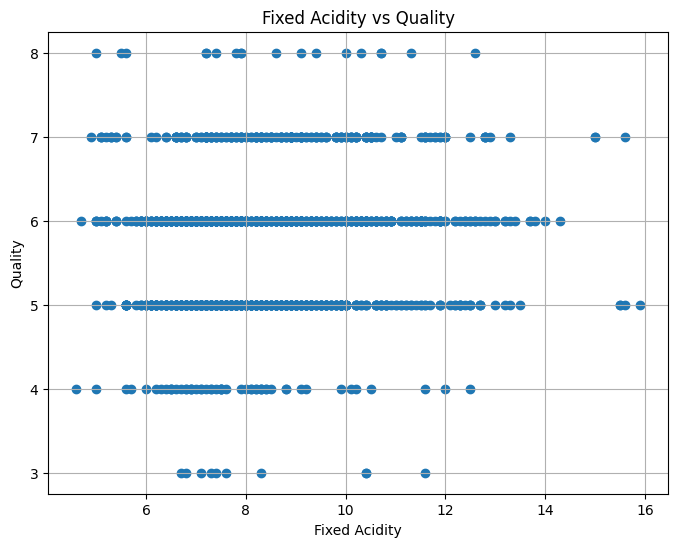

The relation between fixed acidity and quality is: 0.12405164911322428


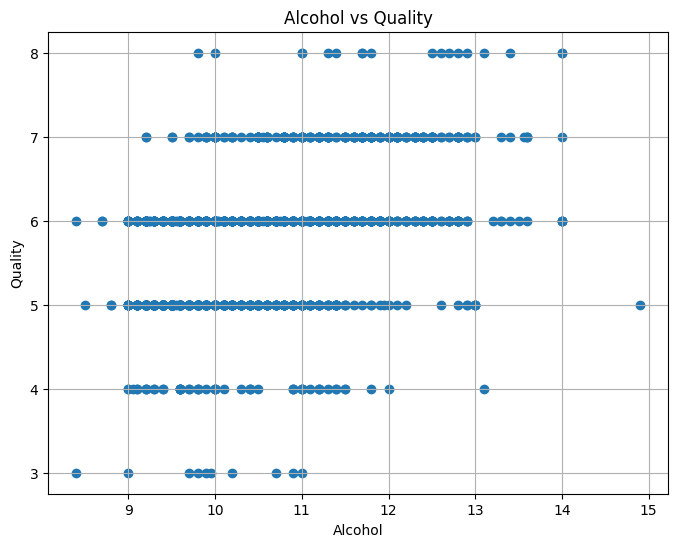

The relation between alcohol and quality is: 0.4761663239995365


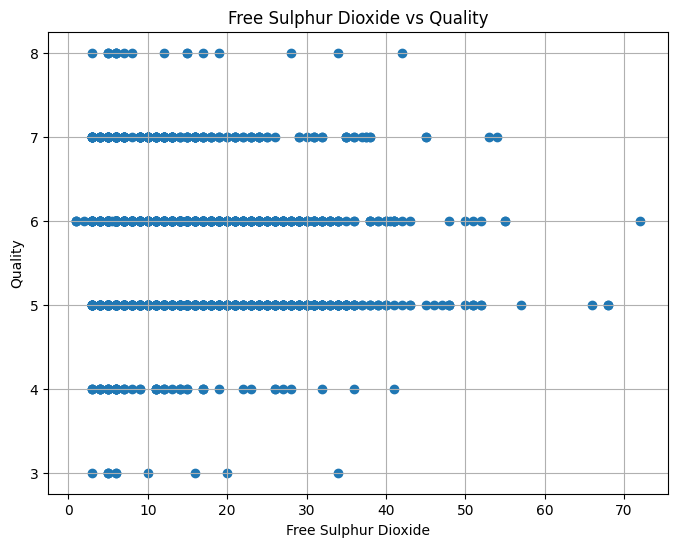

The relation between free sulfur dioxide and quality is: -0.0506560572442763


In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Fixed Acidity vs Quality
plt.figure(figsize=(8, 6))
plt.scatter(df['fixed acidity'], df['quality'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.title('Fixed Acidity vs Quality')
plt.grid(True)
plt.show()
print("The relation between fixed acidity and quality is:",df['fixed acidity'].corr(df['quality']))

# Alcohol vs Quality
plt.figure(figsize=(8, 6))
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs Quality')
plt.grid(True)
plt.show()
print("The relation between alcohol and quality is:", df['alcohol'].corr(df['quality']))

# Free Sulphur Dioxide vs Quality
plt.figure(figsize=(8, 6))
plt.scatter(df['free sulfur dioxide'], df['quality'])
plt.xlabel('Free Sulphur Dioxide')
plt.ylabel('Quality')
plt.title('Free Sulphur Dioxide vs Quality')
plt.grid(True)
plt.show()

print("The relation between free sulfur dioxide and quality is:",df['free sulfur dioxide'].corr(df['quality']))


### 4.	Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?

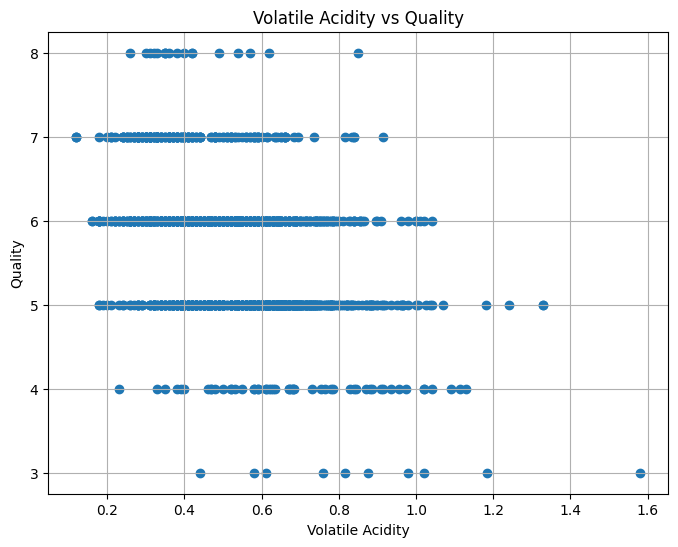

The relation between volatile acidity and quality is: -0.390557780264007


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity vs Quality')
plt.grid(True)  # Add a grid for better visualization
plt.show()
print("The relation between volatile acidity and quality is:",df['volatile acidity'].corr(df['quality']))

### 3.	What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?


In [ ]:
# Filter for best quality wine
best_quality_df = df[df['quality'] == maxi]
# Calculate average residual sugar for best quality
avg_residual_sugar_best = best_quality_df['residual sugar'].mean()
print("Average residual sugar for best quality wine:", avg_residual_sugar_best)

# Filter for lowest quality wine
lowest_quality_df = df[df['quality'] == mini]
# Calculate average residual sugar for lowest quality
avg_residual_sugar_lowest = lowest_quality_df['residual sugar'].mean()
print("Average residual sugar for lowest quality wine:", avg_residual_sugar_lowest)

Average residual sugar for best quality wine: 2.5777777777777775
Average residual sugar for lowest quality wine: 2.6350000000000002


### 5.	Train a Decision Tree model and Random Forest Model separately to predict the Quality of the given samples of wine. Compare the Accuracy scores for both models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', random_state = 0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt*100)
# Assuming y_test and y_pred_dt are already defined
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

# Random Forest
rf = RandomForestClassifier(criterion='entropy', random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf*100)
# Assuming y_test and y_pred_rf are already defined
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)



Decision Tree Accuracy: 57.1875
[[ 0  0  1  0  0  0]
 [ 0  0  6  3  1  0]
 [ 1  6 89 29  5  0]
 [ 0  2 36 72 19  3]
 [ 0  1  3 15 22  1]
 [ 0  0  0  3  2  0]]
Random Forest Accuracy: 67.5
[[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 102  28   0   0]
 [  0   0  30  94   8   0]
 [  0   0   0  21  20   1]
 [  0   0   0   1   4   0]]
